In [1]:
pip install psycopg2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.7/385.7 kB 3.0 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [36 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-11.1-arm64-cpython-311
      creating build/lib.macosx-11.1-arm64-cpython-311/psycopg2
      copying lib/_json.py -> build/lib.macosx-11.1-arm64-cpython-311/psycopg2
      copying lib/extras.py -> build/lib.macosx-11.1-arm64-cpython-311/psycopg2
      copying lib/errorcodes.py -> build/lib.macosx-11.1-arm64-cpython-311/psycopg2
      copying lib/tz.py -> build/lib.macosx-11.1-arm64-cpython-311/psycopg2
      copying lib/_range.py -> build/lib.macosx-11.1-arm64-cpython-311/psycopg2
      copying lib/_ipaddress.py -> build/lib.macosx-11.1-arm64-cpython-311/psycopg2
      copying lib/__init__.py -> 

In [2]:
pip install psycopg2-binary

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2 as ps

In [4]:
conn = ps.connect(dbname="Capstone",
                  user="postgres",
                  password="0ftaMKYldd",
                  port = "5432")

# ANALYSIS

In [5]:
sql = """with mp_sales as (
select 
		concat(first_name, ' ', last_name) as employee_name,
		cat.category_name as categories,
		round ((od.unit_price * quantity)* (1-discount)) as total_sales_amount
		
from orders as o
	left join employees as e on o.employee_id=e.employee_id
	left join order_details as od on o.order_id=od.order_id
	left join products as pr on od.product_id=pr.product_id
	left join categories as cat on pr.category_id=cat.category_id
	)
	
select employee_name,
		categories,
		sum(total_sales_amount) as total_sales
from mp_sales
where employee_name= 'Margaret Peacock'
group by 2,1 """

In [ ]:
# 1) Category-based Distribution of the Top Salesperson by Sales

In [6]:
df = sqlio.read_sql_query(sql,conn)
df

/var/folders/2f/681_7r29273bc2vsjpy7v9cm0000gn/T/ipykernel_43329/3836415318.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = sqlio.read_sql_query(sql,conn)


,employee_name,categories,total_sales
0,Margaret Peacock,Confections,27768.0
1,Margaret Peacock,Condiments,23314.0
2,Margaret Peacock,Seafood,27315.0
3,Margaret Peacock,Grains/Cereals,22582.0
4,Margaret Peacock,Beverages,50310.0
5,Margaret Peacock,Produce,17185.0
6,Margaret Peacock,Dairy Products,33547.0
7,Margaret Peacock,Meat/Poultry,30867.0


<Axes: title={'center': 'Sales Distribution by Category'}, ylabel='total_sales'>

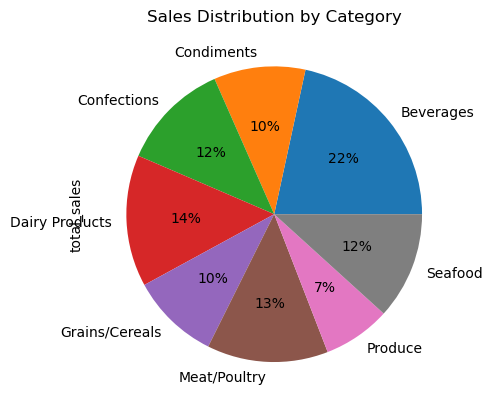

In [7]:
df.groupby(['categories']).sum().plot(kind='pie', y='total_sales', autopct='%1.0f%%', 
                                             title='Sales Distribution by Category', 
                                             legend=False)

In [ ]:
# 2) Category-based Distribution of the Lowest Salesperson by Sales

In [8]:
sql2 = """with sb_sales as (
select 
		concat(first_name, ' ', last_name) as employee_name,
		cat.category_name as categories,
		round ((od.unit_price * quantity)* (1-discount)) as total_sales_amount
		
from orders as o
	left join employees as e on o.employee_id=e.employee_id
	left join order_details as od on o.order_id=od.order_id
	left join products as pr on od.product_id=pr.product_id
	left join categories as cat on pr.category_id=cat.category_id
	)
	
select employee_name,
		categories,
		sum(total_sales_amount) as total_sales
from sb_sales
where employee_name= 'Steven Buchanan'
group by 2,1 """

In [9]:
df2 = sqlio.read_sql_query(sql2,conn)
df2

/var/folders/2f/681_7r29273bc2vsjpy7v9cm0000gn/T/ipykernel_43329/4280454062.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = sqlio.read_sql_query(sql2,conn)


,employee_name,categories,total_sales
0,Steven Buchanan,Dairy Products,21938.0
1,Steven Buchanan,Grains/Cereals,4027.0
2,Steven Buchanan,Condiments,2675.0
3,Steven Buchanan,Produce,7109.0
4,Steven Buchanan,Confections,4809.0
5,Steven Buchanan,Beverages,11000.0
6,Steven Buchanan,Seafood,5745.0
7,Steven Buchanan,Meat/Poultry,11488.0


<Axes: title={'center': 'Sales Distribution by Category'}, ylabel='total_sales'>

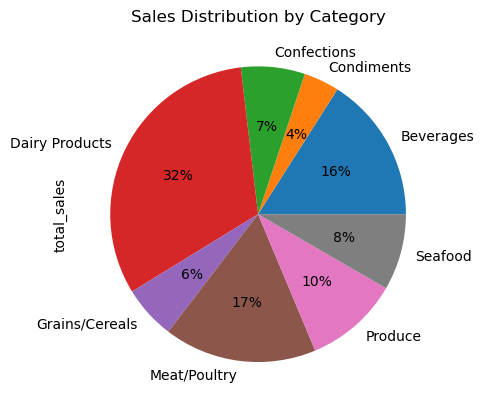

In [10]:
df2.groupby(['categories']).sum().plot(kind='pie', y='total_sales', autopct='%1.0f%%', 
                                             title='Sales Distribution by Category', 
                                             legend=False)

In [11]:
# 3) Category-based Average Price Distribution

sql3 = """select 
		cat.category_name,
		round(avg(unit_price)::numeric,2) as avg_category_price
		
from  products as pr 
left join categories as cat on pr.category_id=cat.category_id
group by 1
"""


In [12]:
df3 = sqlio.read_sql_query(sql3,conn)
df3

/var/folders/2f/681_7r29273bc2vsjpy7v9cm0000gn/T/ipykernel_43329/146072055.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = sqlio.read_sql_query(sql3,conn)


,category_name,avg_category_price
0,Beverages,37.98
1,Produce,32.37
2,Condiments,22.85
3,Grains/Cereals,20.25
4,Meat/Poultry,54.01
5,Confections,25.16
6,Dairy Products,28.73
7,Seafood,20.68


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

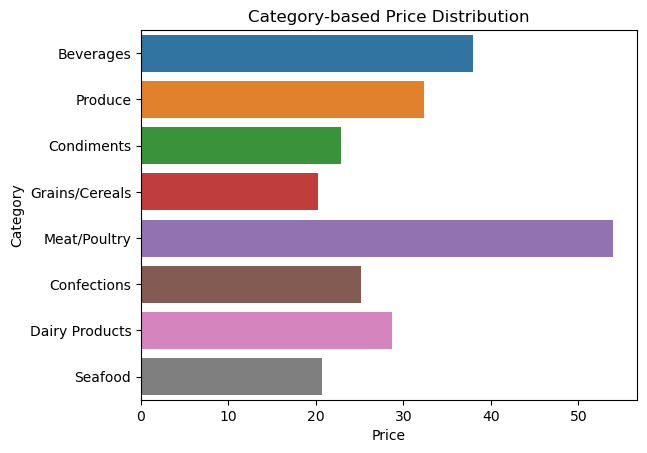

In [14]:
sns.barplot(x='avg_category_price', y='category_name', data=df3)
plt.xlabel('Price')
plt.ylabel('Category')
plt.title('Category-based Price Distribution')
plt.show()

In [15]:
# 4) Price Distribution by Product for the Categories with the Highest and Lowest Average Prices

sql4 = """select 
		product_name,
		round(avg(unit_price)::numeric,2) as avg_unit_price
		
from products as pr 
left join categories as cat on pr.category_id=cat.category_id
	where category_name='Meat/Poultry'
group by 1;
"""

In [16]:
df4 = sqlio.read_sql_query(sql4,conn)
df4

/var/folders/2f/681_7r29273bc2vsjpy7v9cm0000gn/T/ipykernel_43329/702295488.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df4 = sqlio.read_sql_query(sql4,conn)


,product_name,avg_unit_price
0,Mishi Kobe Niku,97.00
1,Pâté chinois,24.00
2,Thüringer Rostbratwurst,123.79
3,Alice Mutton,39.00
4,Perth Pasties,32.80
5,Tourtière,7.45


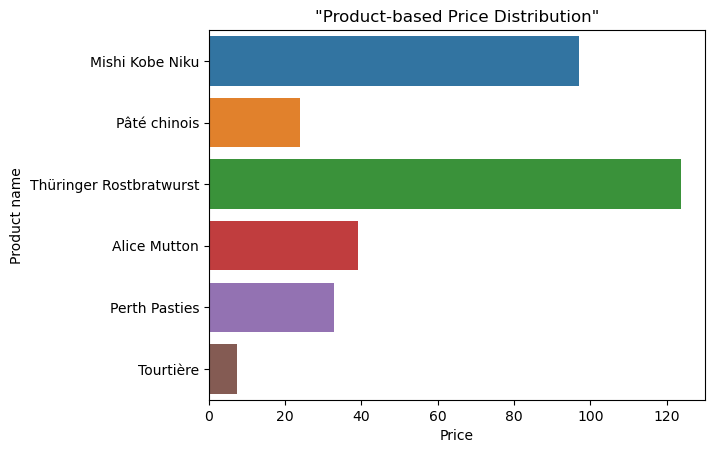

In [17]:
sns.barplot(x='avg_unit_price', y='product_name', data=df4)
plt.xlabel('Price')
plt.ylabel('Product name')
plt.title('"Product-based Price Distribution"')
plt.show()

In [18]:
sql5 = """select 
		product_name,
		round(avg(unit_price)::numeric,2) as avg_unit_price
		
from products as pr 
left join categories as cat on pr.category_id=cat.category_id
	where category_name='Grains/Cereals'
group by 1
"""

In [19]:
df5 = sqlio.read_sql_query(sql5,conn)
df5

/var/folders/2f/681_7r29273bc2vsjpy7v9cm0000gn/T/ipykernel_43329/3333582910.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df5 = sqlio.read_sql_query(sql5,conn)


,product_name,avg_unit_price
0,Gustaf's Knäckebröd,21.00
1,Tunnbröd,9.00
2,Singaporean Hokkien Fried Mee,14.00
3,Filo Mix,7.00
4,Wimmers gute Semmelknödel,33.25
5,Ravioli Angelo,19.50
6,Gnocchi di nonna Alice,38.00


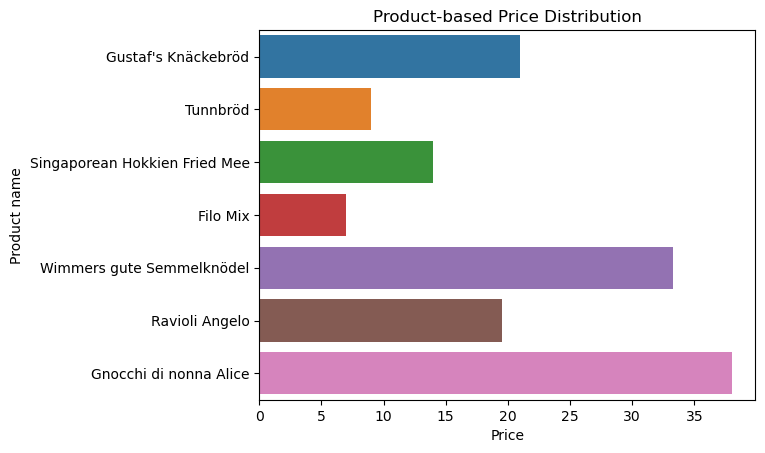

In [20]:
sns.barplot(x='avg_unit_price', y='product_name', data=df5)
plt.xlabel('Price')
plt.ylabel('Product name')
plt.title('Product-based Price Distribution')
plt.show()